# `BallotGraph`
The ballot graph has vertices=ballots, and edges connecting ballots if they are equivalent by a swap of two adjacently ranked candidates, or by the truncation or addition of a candidate in last place.

The `BallotGraph` object can be created from a `PreferenceProfile` object, a number of candidates, or a list of candidates. It has an `allow_partial` parameter that says whether or not the graph will be constructed using partial ballots, or only full linear orderings. If being created from a `PreferenceProfile`, this parameter defaults to `True` to allow for any kind of ballot from a voter.

In [1]:
import votekit.ballot_generator as bg
from votekit.graphs import BallotGraph


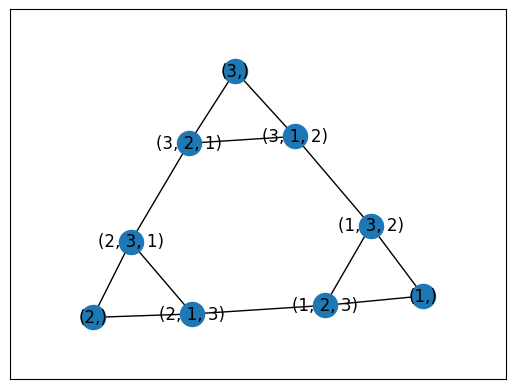

In [2]:
candidates = ["A", "B", "C"]

ballot_graph = BallotGraph(candidates, allow_partial=True)
ballot_graph.draw(labels= False)

Why are there no ballots of length 2? Since the number of candidates was 3, any ballot of length 2 is equivalent to a ballot of length 3.

We can change the `allow_partial` parameter to `False` to only see full linear rankings, and we can also ask the `draw` method to display the labels of the candidates and how many votes a particular ballot received.

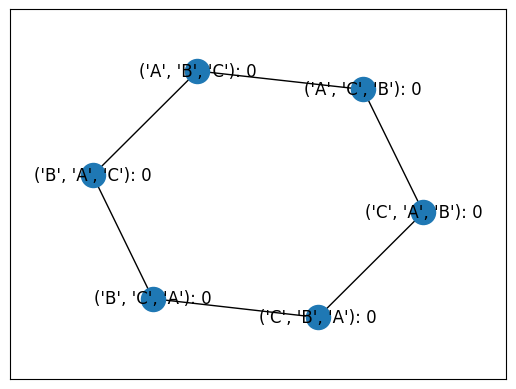

In [3]:
ballot_graph = BallotGraph(candidates, allow_partial = False)
ballot_graph.draw(labels = True)

Check for understanding: why are all of the votes 0?

The BallotGraph has an underlying `graph` attribute which stores a NetworkX graph.

In [4]:
for node, data in ballot_graph.graph.nodes(data = True):
    print(node,data)

(1, 2, 3) {'weight': 0, 'cast': False}
(1, 3, 2) {'weight': 0, 'cast': False}
(2, 3, 1) {'weight': 0, 'cast': False}
(2, 1, 3) {'weight': 0, 'cast': False}
(3, 1, 2) {'weight': 0, 'cast': False}
(3, 2, 1) {'weight': 0, 'cast': False}


This is a bit of a boring example; since the `BallotGraph` was generated from a list of candidates, none of the ballots have any weight and none of the ballots were "cast," (i.e., 0 people voted with that ballot).

If we generate the `BallotGraph` from a `PreferenceProfile`, we should get more interesting results here.

  Ballots Weight
(A, C, B)     12
(B, A, C)     11
(C, A, B)     11
(C, B, A)     10
(A, B, C)      9
(B, C, A)      7


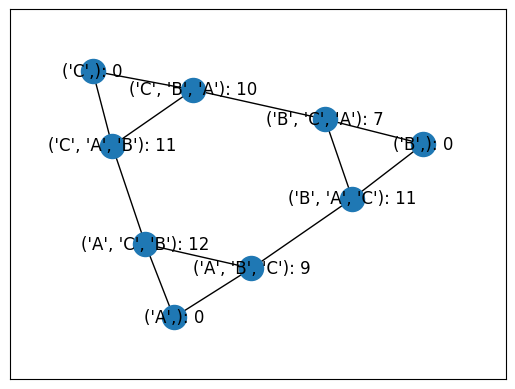

In [5]:
ic = bg.ImpartialCulture(candidates=candidates)
num_ballots = 60
profile = ic.generate_profile(number_of_ballots = num_ballots)
print(profile)

ballot_graph = BallotGraph(profile)
ballot_graph.draw(labels = True)

Let's dig into the node atttributes of the graph to see how the voting information was captured.

In [6]:
for node, data in ballot_graph.graph.nodes(data = True):
    print(node,data)

(1,) {'weight': 0, 'cast': False}
(1, 2, 3) {'weight': Fraction(7, 1), 'cast': True}
(1, 3, 2) {'weight': Fraction(11, 1), 'cast': True}
(2,) {'weight': 0, 'cast': False}
(2, 3, 1) {'weight': Fraction(11, 1), 'cast': True}
(2, 1, 3) {'weight': Fraction(10, 1), 'cast': True}
(3,) {'weight': 0, 'cast': False}
(3, 1, 2) {'weight': Fraction(9, 1), 'cast': True}
(3, 2, 1) {'weight': Fraction(12, 1), 'cast': True}


Check for understanding: only ballots that were in the `PreferenceProfile` should have 'cast'= True, and their 'weight' attribute should correspond to the number of ballots cast.

If we wanted to visualize only the nodes corresponding to cast ballots, we use the `show_cast` parameter in the `draw` method.

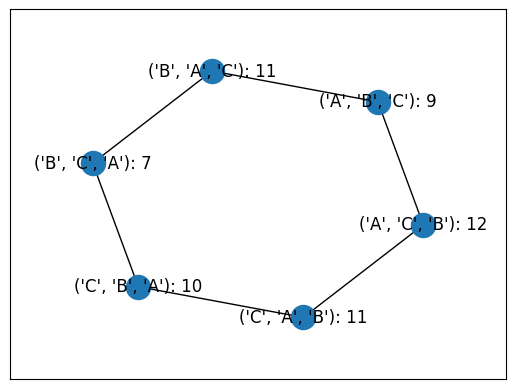

In [7]:
ballot_graph.draw(labels = True, show_cast=True)

We can also write custom functions for displaying nodes. We require these functions to take as input the underlying graph and a node, and return `True` if the node is to be displayed. Suppose we only wanted to see 

In [8]:
def show_big_weight(graph, node):
    # display nodes with more than 10 votes
    if graph.nodes[node]["weight"] >= 10:
        return True
    
    return False
    

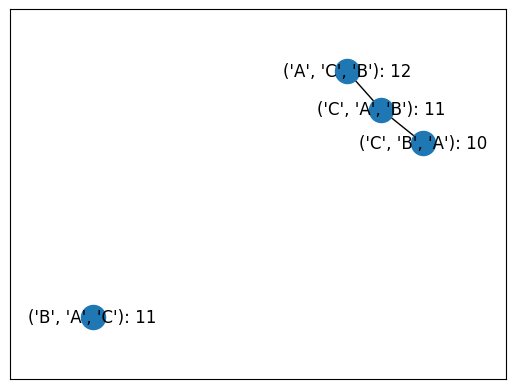

In [9]:
ballot_graph.draw(labels=True, to_display=show_big_weight)

 What if we wanted to explore a particular neighborhood of a ballot? Let's look at the radius 1 neighborhood around the ballot (3,2,1).

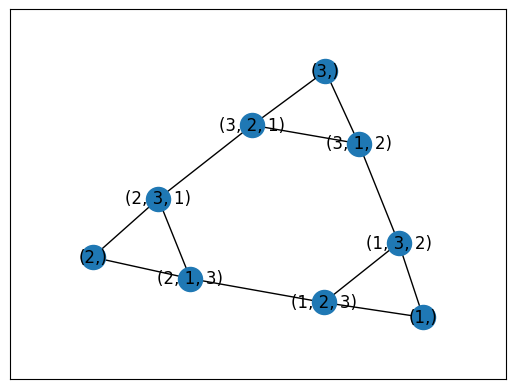

In [10]:
# first draw the entire graph so we know what to look for
ballot_graph = BallotGraph(3)
ballot_graph.draw()

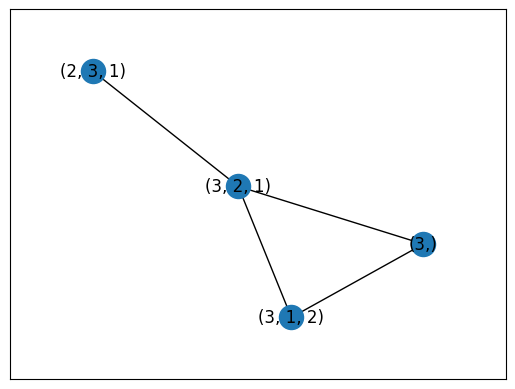

In [11]:
# the neighborhoods parameter takes a list of tuples (node, radius)
# and displays the corresponding neighborhoods
ballot_graph.draw(neighborhoods=[((3,2,1), 1)])

Check for understanding: is this picture what you expected?

We can also draw multiple neighborhoods.

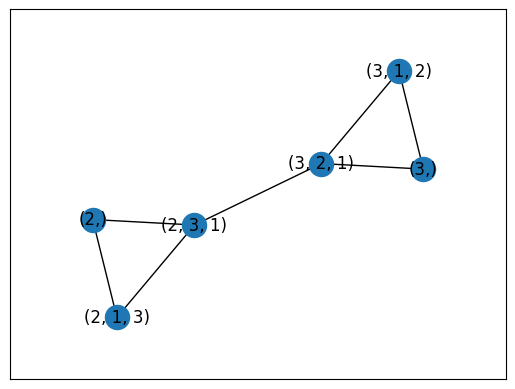

In [12]:
ballot_graph.draw(neighborhoods=[((3,2,1), 1),
                                 ((2,), 1)])